Some linear least squares fitting examples

First, let's define a function and get some random sample

<Container object of 3 artists>

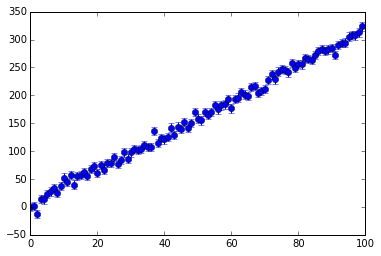

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

def func(x) :
    ''' A simple polynomial function '''
    a=5.6
    b=3.1
    return a + b*x   #+ x**2

# get 100 samples with homoschedastic errors
n=100
sigma=7.5+np.zeros(100)
x=np.arange(n)
# get the y values with gaussian errors
y=func(x)+np.random.normal(0.,sigma,n)
# plot it up
plt.clf()
plt.errorbar(x,y,yerr=sigma,marker='o',linestyle='none')


In [10]:
# for a straight line fit, calculate the required sums
# short way
s=np.sum(1./sigma**2)
sx=np.sum(x/sigma**2)
sy=np.sum(y/sigma**2)
sxx=np.sum(x**2/sigma**2)
sxy=np.sum(x*y/sigma**2)
print s, sx, sy, sxx, sxy


1.77777777778 88.0 282.187800848 5837.33333333 18590.993834


4.25930421082 3.12063300538
chi2:  88.7584221618
probability:  0.263021570339


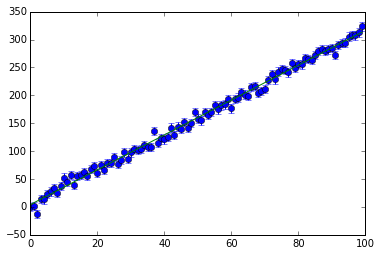

In [11]:

# now calculate the parameters
a = (sxx * sy - sx *sxy) / (s*sxx - sx**2)
b = (s * sxy - sx *sy) / (s*sxx - sx**2)

print a, b
plt.errorbar(x,y,yerr=sigma,marker='o',linestyle='none')
plt.plot(x,a+b*x)
plt.draw()

# calculate chi2
chi2=np.sum((y-(a+b*x))**2/sigma**2)
print 'chi2: ', chi2

df=n-2
from scipy import stats as stats
cdf=stats.chi2.cdf(chi2,df)
print 'probability: ', cdf



OK, now let's look at it with the general linear least squares formulation

In [12]:
def deriv(x) :
    # x should be numpy array, then we can return vectors of derivatives
    try :
        return [np.ones(len(x)),x]
    except :
        return [1.,x]

npar=2
alpha=np.zeros([npar,npar])
beta=np.zeros(npar)
for i in range(len(x)) :
    for k in np.arange(npar) :
        beta[k] += (deriv(x[i])[k]*y[i] /sigma[i]**2)
        for j in np.arange(npar) :
            alpha[k,j]+=(deriv(x[i])[k]*deriv(x[i])[j]/sigma[i]**2)
c=np.linalg.inv(alpha)
print np.dot(c,beta)


[ 4.25930421  3.12063301]


In [13]:
# note can do this more compactly with vector arithmetic
# loop over parameters, sums over data points are done with vector arithmetic
for k in np.arange(npar) :
    beta[k] = np.sum(deriv(x)[k]*y/sigma**2)
    for j in np.arange(npar) :
        alpha[k,j] = np.sum(deriv(x)[k]*deriv(x)[j]/sigma**2)
c=np.linalg.inv(alpha)
print np.dot(c,beta)

[ 4.25930421  3.12063301]


OK, now we'll just use the canned astropy routines


Model: Polynomial1D
Inputs: (u'x',)
Outputs: (u'y',)
Model set size: 1
Degree: 1
Parameters:
          c0            c1     
    ------------- -------------
    4.25930421082 3.12063300538
[ 4.25930421  3.12063301]


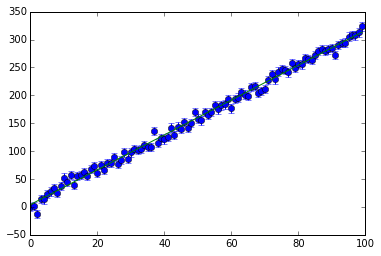

In [14]:
from astropy.modeling import models, fitting
fit_p = fitting.LinearLSQFitter()
p_init = models.Polynomial1D(degree=1)
pfit = fit_p(p_init,x,y)
print pfit
print pfit.parameters
# plot it up
plt.errorbar(x,y,yerr=sigma,marker='o',linestyle='none')
# pfit(x) evaluates the fit at locations x
plt.plot(x,pfit(x))
plt.draw()


OK, here's a nonlinear function

<Container object of 3 artists>

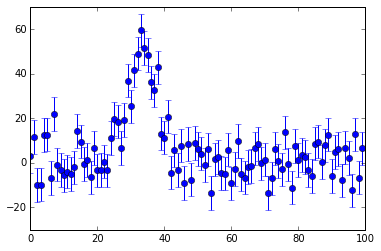

In [22]:

def func(x) :
    ''' A simple Gaussian function '''
    a=50.6
    b=33.1
    c=4.
    return a * np.exp(-0.5 * (x-b)**2/c**2)  

# get 100 samples with homoschedastic errors
n=100
sigma=7.5+np.zeros(100)
x=np.arange(n)
# get the y values with gaussian errors
y=func(x)+np.random.normal(0.,sigma,n)
# plot it up
plt.clf()
plt.errorbar(x,y,yerr=sigma,marker='o',linestyle='none')

Model: Gaussian1D
Inputs: (u'x',)
Outputs: (u'y',)
Model set size: 1
Parameters:
      amplitude        mean         stddev   
    ------------- ------------- -------------
    51.2277121209 33.4280041302 4.21281365871
[ 51.22771212  33.42800413   4.21281366]


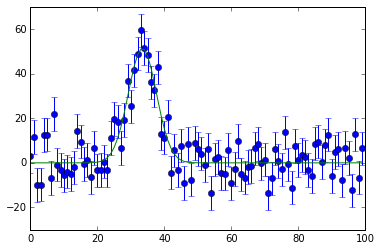

In [26]:
from astropy.modeling import models, fitting
fit_p = fitting.LevMarLSQFitter()
p_init = models.Gaussian1D(amplitude=60,mean=30,stddev=10)
pfit = fit_p(p_init,x,y)
print pfit
print pfit.parameters
# plot it up
plt.errorbar(x,y,yerr=sigma,marker='o',linestyle='none')
# pfit(x) evaluates the fit at locations x
plt.plot(x,pfit(x))
plt.draw()

In [ ]:
from scipy import optimize
optimize.fmin()